In [103]:
import pandas as pd

hs_df = pd.read_csv("../data/hatespeech.csv")

hs_df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [104]:
import nltk
import numpy as np
from nltk import TweetTokenizer

#hs_only_df = hs_df[hs_df['hate_speech'] > 0.5]

stopwords = nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))

for punctuation in '''!@#$%^&*()?:;/.,`'"''':
    stop.add(punctuation)


def tokenize_tweets(tweets, stopwords=None):
    tokenizer = TweetTokenizer()
    for tweet in tweets:
        tokens = tokenizer.tokenize(tweet)
        if stopwords is not None:
            tokens = [tok for tok in tokens if tok not in stopwords]
        yield tokens

def tokenize_tweets_and_flatten(tweets):
    tokenized_tweets = tokenize_tweets(tweets, stop)
    return (tok for tweet in tokenized_tweets for tok in tweet)

all_tokens = np.array(list(tokenize_tweets_and_flatten(hs_df['tweet'].str.lower())))
all_tokens

[nltk_data] Downloading package stopwords to /home/astrid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['rt', '@mayasolovely', 'woman', ..., 'white', 'coll',
       'http://t.co/h0dyebvnzb'], dtype='<U84')

In [105]:
tokens, counts = np.unique(all_tokens, return_counts=True)
frequency_df = pd.DataFrame(
    data={'token': tokens, 'count': counts}
)
frequency_df.set_index('token', inplace=True)
frequency_df.sort_values('count', inplace=True, ascending=False)

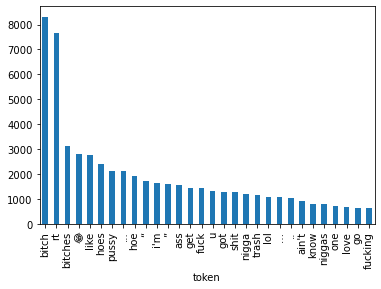

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
frequency_df['count'].iloc[:30].plot.bar()
plt.show()